In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Ödev 1
Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

In [27]:
states_all = pd.read_csv("states_all.csv")
states_all.to_csv('eğitimtemiz.csv', encoding = 'utf8')

In [5]:
states_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [6]:
def null_hesapla(df):
    yüzde=df.isnull().sum()*100/df.shape[0]
    adet=df.isnull().sum()
    out=pd.DataFrame(list(zip(adet,yüzde)),columns=['adet','yüzde'])
    return out[out.adet>0]

In [7]:
null_hesapla(states_all)

,adet,yüzde
3,263,17.627346
4,212,14.209115
5,212,14.209115
6,212,14.209115
7,212,14.209115
8,212,14.209115
9,212,14.209115
10,212,14.209115
11,263,17.627346
12,212,14.209115


# Ödev 2
Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

(array([  3.,   0.,   3.,  15.,  35.,  48.,  94., 144., 163.,  31.]),
 array([187.13466996, 193.76329908, 200.39192819, 207.02055731,
        213.64918643, 220.27781555, 226.90644466, 233.53507378,
        240.1637029 , 246.79233202, 253.42096113]),
 <a list of 10 Patch objects>)

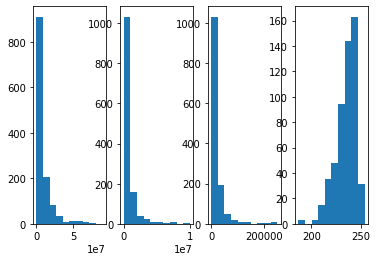

In [8]:
plt.subplot(141)
plt.hist(states_all["TOTAL_REVENUE"])
plt.subplot(142)
plt.hist(states_all["FEDERAL_REVENUE"])
plt.subplot(143)
plt.hist(states_all["GRADES_PK_G"])
plt.subplot(144)
plt.hist(states_all["AVG_MATH_4_SCORE"])



Yıllar dikkate alınmadığında
*Kolonlardaki veriler bir sıralama içerisinde olmadığından, eksik değerlerin enterpolasyon ile doldurulması mantıklı değildir. 
*Grafikler incelendiğinde dağılımlardan normal dağılıma yakın olanların medyan veya ortalama ile diğerlerini mod ile doldurulması mantıklı olabilir.

# ÖDEV3
Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.


In [12]:
cols=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [13]:
states_all2 = states_all.copy()
years=states_all2['YEAR'].unique()
for col in cols:
    for year in years:
        şart=states_all2['YEAR']==year
        states_all2.loc[şart, col]= states_all2.loc[şart, col].fillna(states_all2[şart][col].mean())
states_all2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304


In [14]:
null_hesapla(states_all2)

,adet,yüzde
3,107,7.171582
4,51,3.418231
5,51,3.418231
6,51,3.418231
7,51,3.418231
8,51,3.418231
9,51,3.418231
10,51,3.418231
11,107,7.171582
12,51,3.418231


# Ödev4
Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

In [16]:
states_all3 = states_all.copy()
years = states_all3["YEAR"].unique()
for col in cols:
    for year in years:
        YIL_SART = states_all3["YEAR"] == year
        states_all3.loc[YIL_SART, col] = states_all3.loc[YIL_SART, col].interpolate()
states_all3 

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304


In [17]:
null_hesapla(states_all3)

,adet,yüzde
3,107,7.171582
4,51,3.418231
5,51,3.418231
6,51,3.418231
7,51,3.418231
8,51,3.418231
9,51,3.418231
10,51,3.418231
11,107,7.171582
12,51,3.418231


# Ödev5
İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

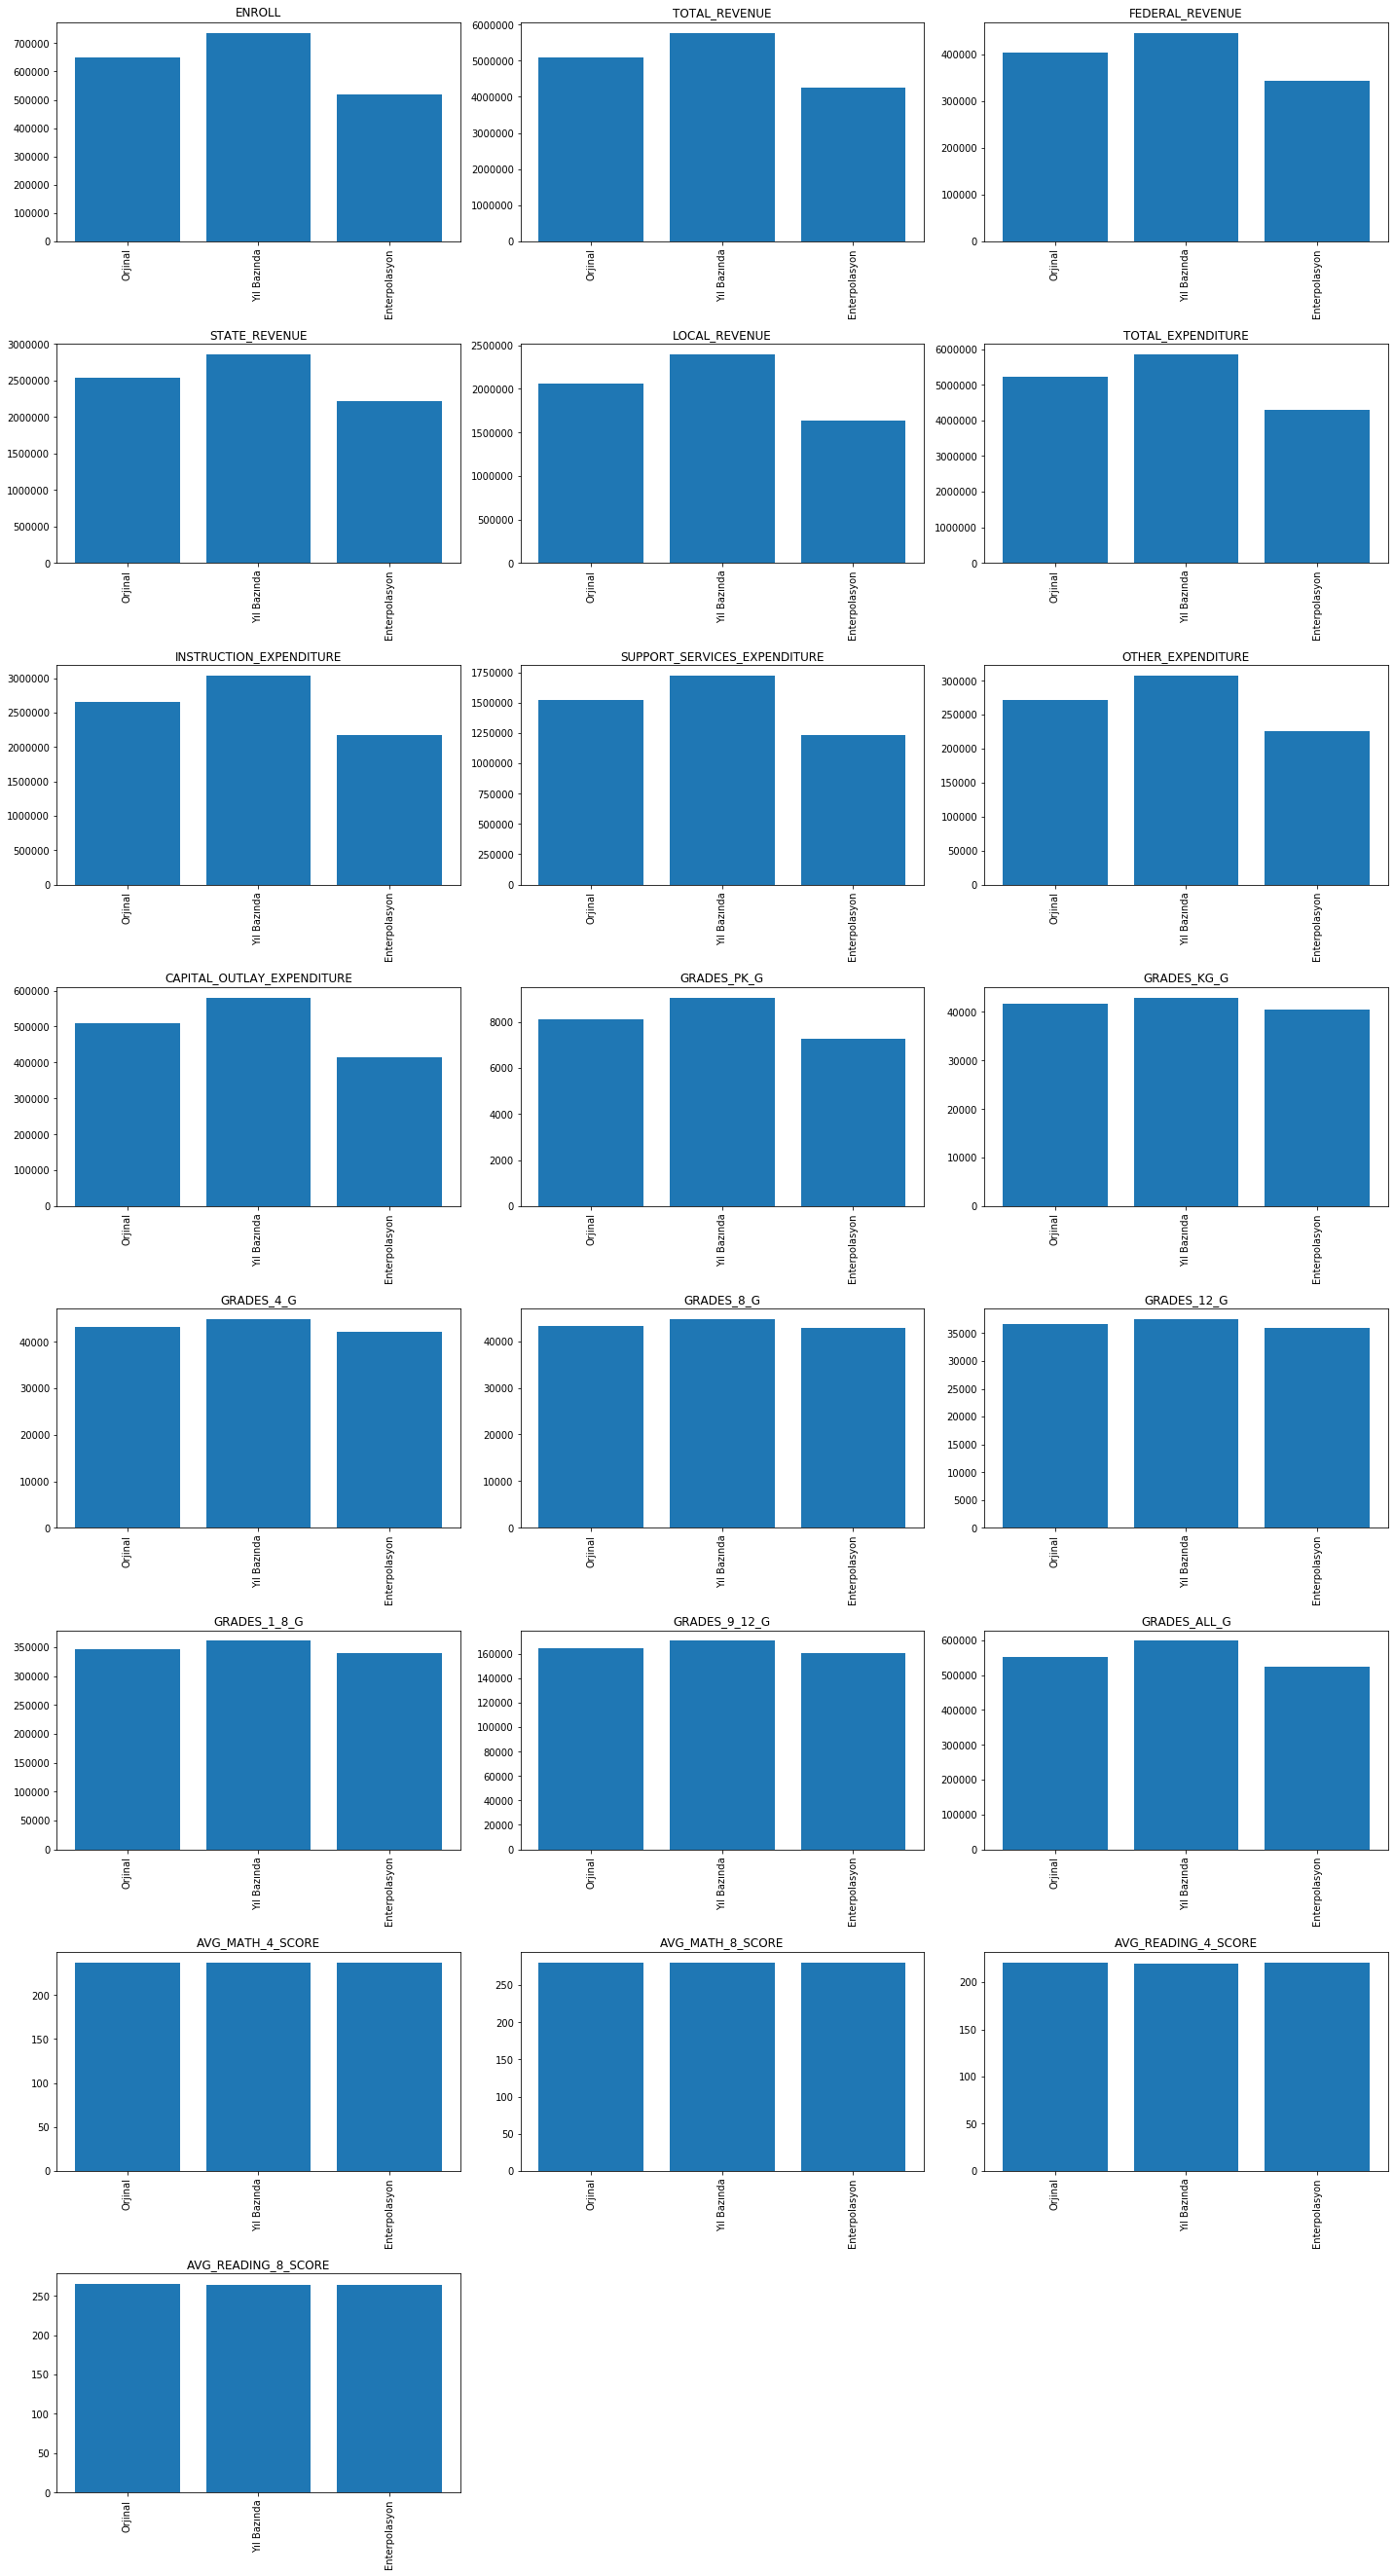

In [20]:
fig=plt.figure(figsize=(20,100))

for i, col in enumerate(cols):
    df=pd.concat([states_all[col],states_all2[col],states_all3[col]], axis=1)
    
    plt.subplot(len(cols),3,i+1)
    plt.bar(["Orjinal", "Yıl Bazında","Enterpolasyon"],df.median())
    plt.xticks(rotation="vertical")
    plt.title("{}".format(col))
    
plt.tight_layout()
plt.show()

bazı verilerde ciddi anlamda farklılıklar olmakla beraber genel olarak boş değerleri farklı şekilde doldursakta birbirine yakın değerler elde edilmektedir.

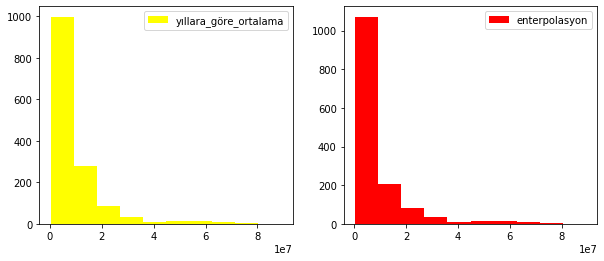

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(states_all2['TOTAL_REVENUE'], label='yıllara_göre_ortalama', color='yellow') 
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.hist(states_all3['TOTAL_REVENUE'], label='enterpolasyon', color='red') 
plt.legend(loc='upper right')
plt.show()

yıllara göre ortalama ile değerleri doldurduğumuzda
enterpolasyon yönteminden çok farkı olmamakla birlikte aşırı değerlerin daha az olduğu gözlemlenmektedir.